# ML Model: KNN/k-fold crossvalidation/Decision Tree

The goal of this notebook is to get practice with classification on Mnist784 and Titanic Dataset.
## Collaborators: Xiang Li, Zijie Li

## KNN on Mnist_784 

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. Use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from). 

In [266]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


b) Train a KNN model (on the training set) and print out the confusion matrix when predicting the testing set. 

In [212]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4,n_jobs=-1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)



In [213]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix( y_test,y_pred))
from sklearn.metrics import accuracy_score
print("accuracy score: ",accuracy_score(y_test, y_pred))

[[1371    1    1    0    1    2    2    1    0    1]
 [   1 1624    2    1    1    0    1    2    0    0]
 [  15   10 1385    3    2    1    0   13    3    1]
 [   4    5    9 1375    0   10    2   13    8    5]
 [   1    9    2    0 1290    0    0    5    0   21]
 [   4    0    1   14    2 1255   11    2    2    6]
 [   5    1    0    0    3    7 1314    0    1    0]
 [   2   17    2    0    3    0    0 1411    0    9]
 [   6   17    5   11    6   23    5    2 1264   12]
 [   2    6    2    9   24    2    0   23    1 1304]]
accuracy score:  0.9709285714285715


Overall, the model's accuracy score indicates that it is good. 
The most confused class is the last class. 

c) For K ranging from 1 to 20:
1. train a KNN on the training data 
2. record the training and testing accuracy 

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

In [214]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm
train_accuracy = []
test_accuracy = []
for k in tqdm(range(1, 21)):
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_train_pred = knn.predict(X_train)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_pred))

# plot

100%|██████████| 20/20 [45:38<00:00, 136.91s/it]


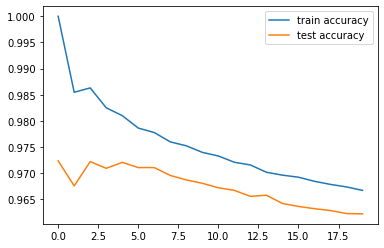

In [215]:
import matplotlib.pyplot as plt
plt.plot(train_accuracy, label="train accuracy")
plt.plot(test_accuracy, label="test accuracy")
plt.legend()
plt.show()

At k = 3, it is optimal because we see from k = 3 that its accuracy is the highest. 

d) Using the optimal model found in c), plot the confusion matrix

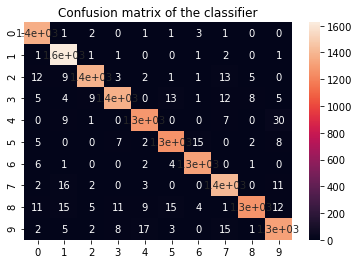

In [267]:
import seaborn as sns

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_test_pred= neigh.predict(X_test)
matrix = confusion_matrix(y_test, y_test_pred)   
sns.heatmap(matrix, annot=True)
plt.title('Confusion matrix of the classifier')
plt.show()

The least confusion is at k = 1 while the most confusion is at k = 8 and k = 5.

e) Using the entire dataset (training + testing set): Use k-fold cross validation (with k=10) to evaluate the perfomance of your KNN model. By varying K from 1 to 20 as in c), determine the optimal number of neighbors for your KNN model based on the mean cv accuracy. Plot a graph of the training and testing set accuracy (use the mean cv accuracy) as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Discuss similarities or differences with results in c). 

100%|██████████| 20/20 [9:04:01<00:00, 1632.05s/it]  


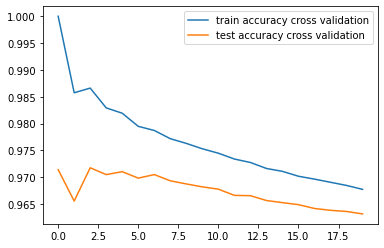

In [217]:
from sklearn.model_selection import cross_validate
from tqdm import tqdm

train_accuracy_cross_vali = []
test_accuracy_cross_vali = []
for k in tqdm(range(1, 21)):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    neigh = knn.fit(X_train, y_train)
    scores = cross_validate(neigh, X, y, cv=10, return_train_score=True)
    train_accuracy_cross_vali.append(scores['train_score'].mean())
    test_accuracy_cross_vali.append(scores['test_score'].mean())

# plot
plt.plot(train_accuracy_cross_vali, label="train accuracy cross validation")
plt.plot(test_accuracy_cross_vali, label="test accuracy cross validation")
plt.legend()
plt.show()


f) Using the best model from d), pick an image at random and plot it next to its k nearest neighbors. **- 7 points**

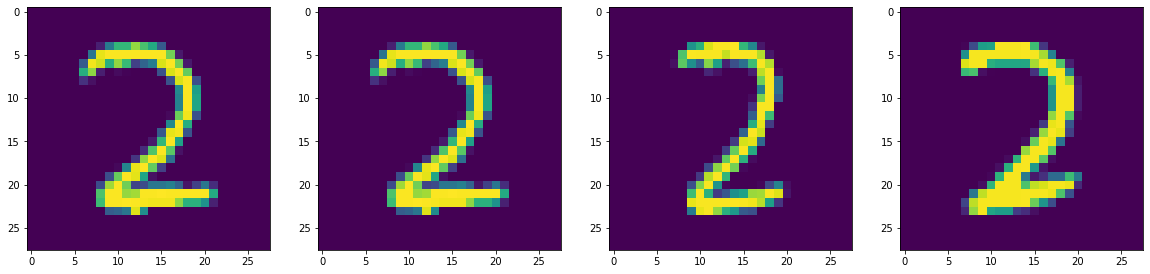

In [268]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import random

def get_random_image():
    random_index = random.randint(0, len(X_train))
    return X_train[random_index]

def get_nearest_neighbors(image, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X_train)
    distances, indices = neigh.kneighbors([image])
    return distances, indices

def plot_nearest_neighbors(image, distances, indices):
    fig, axes = plt.subplots(1, len(indices[0]) + 1, figsize=(20, 20))
    axes[0].imshow(image.reshape(28, 28))
    for i, ax in enumerate(axes[1:]):
        ax.imshow(X_train[indices[0][i]].reshape(28, 28))
    plt.show()

image = get_random_image()
distances, indices = get_nearest_neighbors(image, 3)
plot_nearest_neighbors(image, distances, indices)
    


g) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat e) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed. **- 7 points**

100%|██████████| 20/20 [16:01<00:00, 48.07s/it]


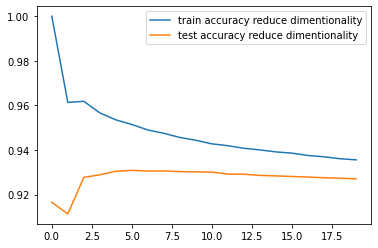

In [219]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

dimensionality_reduction = PCA(n_components=10)
train_mean = []
test_mean = []
for k in tqdm(range(1, 21)):
    knn_model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model = make_pipeline(dimensionality_reduction, knn_model)
    model.fit(X, y)
    cross_validation = cross_validate(model, X, y, cv=10, return_train_score=True)
    train_mean.append(cross_validation['train_score'].mean())
    test_mean.append(cross_validation['test_score'].mean())
    
plt.plot(train_mean, label="train accuracy reduce dimentionality")
plt.plot(test_mean, label="test accuracy reduce dimentionality")
plt.legend()
plt.show()

## Decision Tree 

a) handle the missing values in the datasets. 

In [220]:
import pandas as pd
import csv

f = pd.read_csv("train.csv")
df_train = pd.DataFrame(f)



In [221]:
def Age_replace_with_mean(df):
    return df['Age'].fillna(df['Age'].mean())

df_train['Age'] = Age_replace_with_mean(df_train)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [222]:
def gender_to_numerical(df):
    return df.replace(['male','female'],['0','1'])

df_train = gender_to_numerical(df_train)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [223]:
def Fare_replace_with_mean(df):
    return df['Fare'].fillna(df['Fare'].mean())

df_train['Fare'] = Fare_replace_with_mean(df_train)

In [224]:
f = pd.read_csv("test.csv")
df_test = pd.DataFrame(f)


In [225]:
def replace_with_mean(df):
    return df['Age'].fillna(df['Age'].mean())

df_test['Age'] = replace_with_mean(df_test)

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [226]:
def gender_to_numerical(df):
    return df.replace(['male','female'],['0','1'])

df_test = gender_to_numerical(df_test)

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


##### 1. We didn't drop the cabin columns because in b we will do the preprocessing to the column.
##### 2. We replace the nan value in Age with the mean age.
##### 3. We transfer the sex to a numerical value: male 0 female 1.


b) add new numerical features / columns to the datasets that might be related to the survival of individuals.

- `has_cabin` should have a value of 0 if the `cabin` feature is `nan` and 1 otherwise
- `family_members` should have the total number of family members (by combining `SibSp` and `Parch`)
- `title_type`: from the title extracted from the name, we will categorize it into 2 types: `common` for titles that many passengers have, `rare` for titles that few passengers have. Map `common` to 1 and `rare` to 0. Describe what threshold you used to define `common` and `rare` titles and how you found it.
- `fare_type`: using Kmeans clustering on the fare column, find an appropriate number of clusters / groups of similar fares. Using the clusters you created, `fare_price` should be an ordinal variable that represents the expensiveness of the fare. For example if you split fare into 3 clusters ( 0 - 15, 15 - 40, and 40+ ) then the `fare_price` value should be `0` for `fare` values 0 - 15, `1` for 15 - 40, and `2` for 40+.

Note: The features must be numerical because the sklearn `DecisionTreeClassifier` can only take on numerical features.

In [227]:
# has_cabin feature
def has_cabin(df):
    return df['Cabin'].notnull().astype('int')

df_train['has_cabin'] = has_cabin(df_train)
df_test['has_cabin'] = has_cabin(df_test)

df_train=df_train.drop(columns=['Cabin'])
df_test=df_test.drop(columns=['Cabin'])


    
    

In [228]:
#family size feature
def family_size(df):
    return df['SibSp'] + df['Parch'] + 1

df_train['family_size'] = family_size(df_train)
df_test['family_size'] = family_size(df_test)

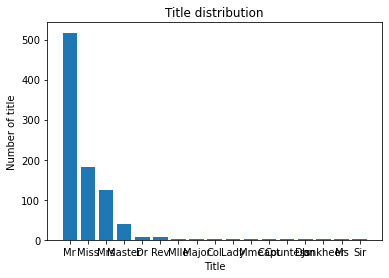

In [229]:
#title_type feature
def title_type(df):
    return df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

df_train['title_type'] = title_type(df_train)
df_test['title_type'] = title_type(df_test)

plt.bar(df_train['title_type'].value_counts().index, df_train['title_type'].value_counts())
plt.xlabel("Title")
plt.ylabel("Number of title")
plt.title("Title distribution")
plt.show()
# From the graph, The threshold is 20 for train data

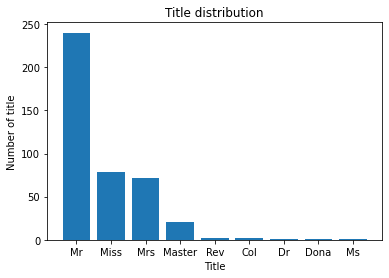

In [230]:
plt.bar(df_test['title_type'].value_counts().index, df_test['title_type'].value_counts())
plt.xlabel("Title")
plt.ylabel("Number of title")
plt.title("Title distribution")
plt.show()
# From the graph, The threshold is 20 for test data

In [231]:
def title_type_to_numerical(df):
    return df.replace(['Mr','Miss','Mrs','Master','Dr','Rev','Col','Major','Mlle','Countess','Ms','Lady','Jonkheer','Don','Mme','Capt','Sir'],['1','1','1','1','0','0','0','0','0','0','0','0','0','0','0','0','0'])

df_train = title_type_to_numerical(df_train)
df_test = title_type_to_numerical(df_test)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,has_cabin,family_size,title_type
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,2,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,1,2,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,1,1


In [232]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,has_cabin,family_size,title_type
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q,0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S,0,2,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q,0,1,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S,0,3,1


In [233]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# fare_type feature
Kmean = KMeans(n_clusters=2)
X = Kmean.fit_predict(df_train[['Fare']])
score = silhouette_score(df_train[['Fare']], X)
print("For n_clusters = 2, silhouette score is {})".format(score))
Kmean = KMeans(n_clusters=3)
X = Kmean.fit_predict(df_train[['Fare']])
score = silhouette_score(df_train[['Fare']], X)
print("For n_clusters = 3, silhouette score is {})".format(score))
Kmean = KMeans(n_clusters=4)
X = Kmean.fit_predict(df_train[['Fare']])
score = silhouette_score(df_train[['Fare']], X)
print("For n_clusters = 4, silhouette score is {})".format(score))
Kmean = KMeans(n_clusters=5)
X = Kmean.fit_predict(df_train[['Fare']])
score = silhouette_score(df_train[['Fare']], X)
print("For n_clusters = 5, silhouette score is {})".format(score))
Kmean = KMeans(n_clusters=6)
X = Kmean.fit_predict(df_train[['Fare']])
score = silhouette_score(df_train[['Fare']], X)
print("For n_clusters = 6, silhouette score is {})".format(score))
Kmean = KMeans(n_clusters=7)
X = Kmean.fit_predict(df_train[['Fare']])
score = silhouette_score(df_train[['Fare']], X)
print("For n_clusters = 7, silhouette score is {})".format(score))

For n_clusters = 2, silhouette score is 0.8343905252862145)
For n_clusters = 3, silhouette score is 0.7668637899771386)
For n_clusters = 4, silhouette score is 0.7630704192611278)
For n_clusters = 5, silhouette score is 0.7551207673465404)
For n_clusters = 6, silhouette score is 0.7118999803204414)
For n_clusters = 7, silhouette score is 0.7181442874965281)


In [234]:
#fare_type feature
Kmean = KMeans(n_clusters=2)
X = Kmean.fit_predict(df_train[['Fare']])
label = Kmean.labels_
df_train['fare_type'] = label
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,has_cabin,family_size,title_type,fare_type
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,1,2,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,1,1,0


c) Some features are now redundant or not useful. Please remove them from the dataset.

Then, train a Decision Tree Classifier using all numerical features you think may be related to survival (justify any that you remove). Set the `max_depth` parameter to an appropriate quantity to reduce the runtime and avoid overfitting.

In [235]:
df_train = df_train.drop(columns=['PassengerId','Name','Ticket','SibSp','Parch','Fare','Embarked'])

In [236]:
df_train.head()

,Survived,Pclass,Sex,Age,has_cabin,family_size,title_type,fare_type
0,0,3,0,22.0,0,2,1,0
1,1,1,1,38.0,1,2,1,0
2,1,3,1,26.0,0,1,1,0
3,1,1,1,35.0,1,2,1,0
4,0,3,0,35.0,0,1,1,0


In [237]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

y = df_train['Survived']
X = df_train.drop(columns=['Survived'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
Tree = DecisionTreeClassifier(max_depth =3)
Tree.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3)

We drop the PassengerId here since PassengerId will not contribute to the decision tree of whether the passenger is survived or not.
Also, we drop all the non-numerical columns in the dataframe. 

d) Plot the decision tree. Briefly explains how it works.

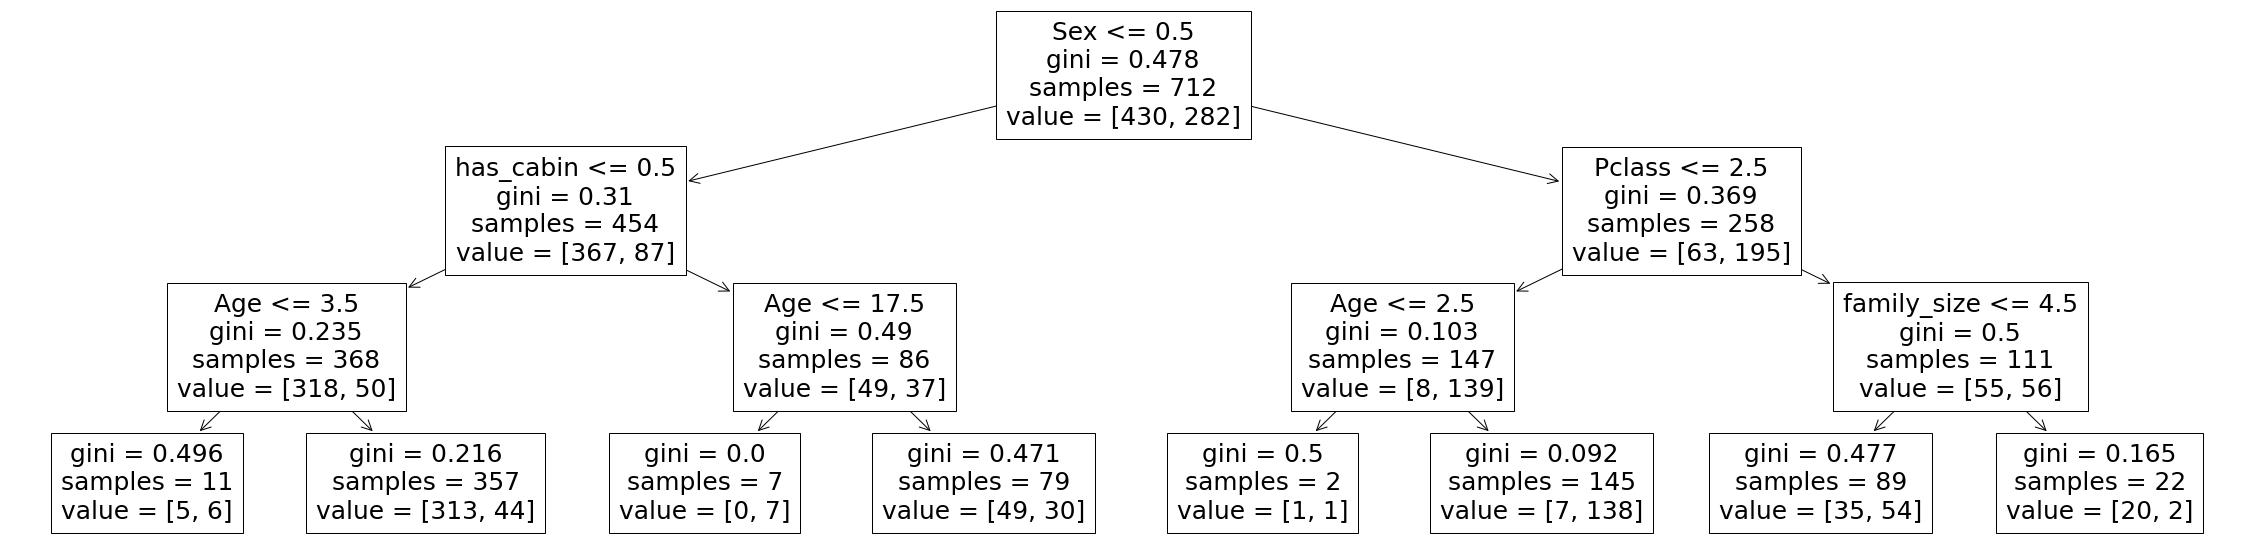

In [238]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,10))
plot_tree(Tree,feature_names=['Pclass','Sex','Age','has_cabin','family_size','title_type','fare_type'])
plt.show()

Decision trees will split each features into two nodes. And each split symbolizes the decision (classification). When we go through the decision tree till the end, we will see whether the sample is survived or not. 

e) Evaluate the classifier on the test set by plotting the confusion matrix. Comment on the pitfalls of the model (to help: For the examples that were misclassified, choose two at random and walk through the decision tree with their attributes and try to understand why the misclassification occured). 

Accuracy score: 0.8156424581005587


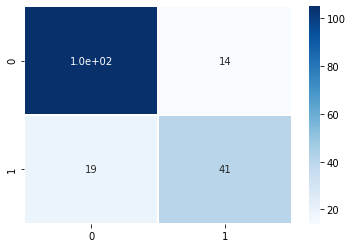

In [239]:
tree_pred= Tree.predict(X_test)
matrix=confusion_matrix(y_test,tree_pred)
sns.heatmap(matrix, annot=True, cmap='Blues',linewidths=1)
print("Accuracy score:",accuracy_score(y_test, tree_pred))

This model did not include the feature of fare_type where we previously assigned into two clusters and the title_type. 

f) Tune the parameters of the decision tree to improve its performance. 

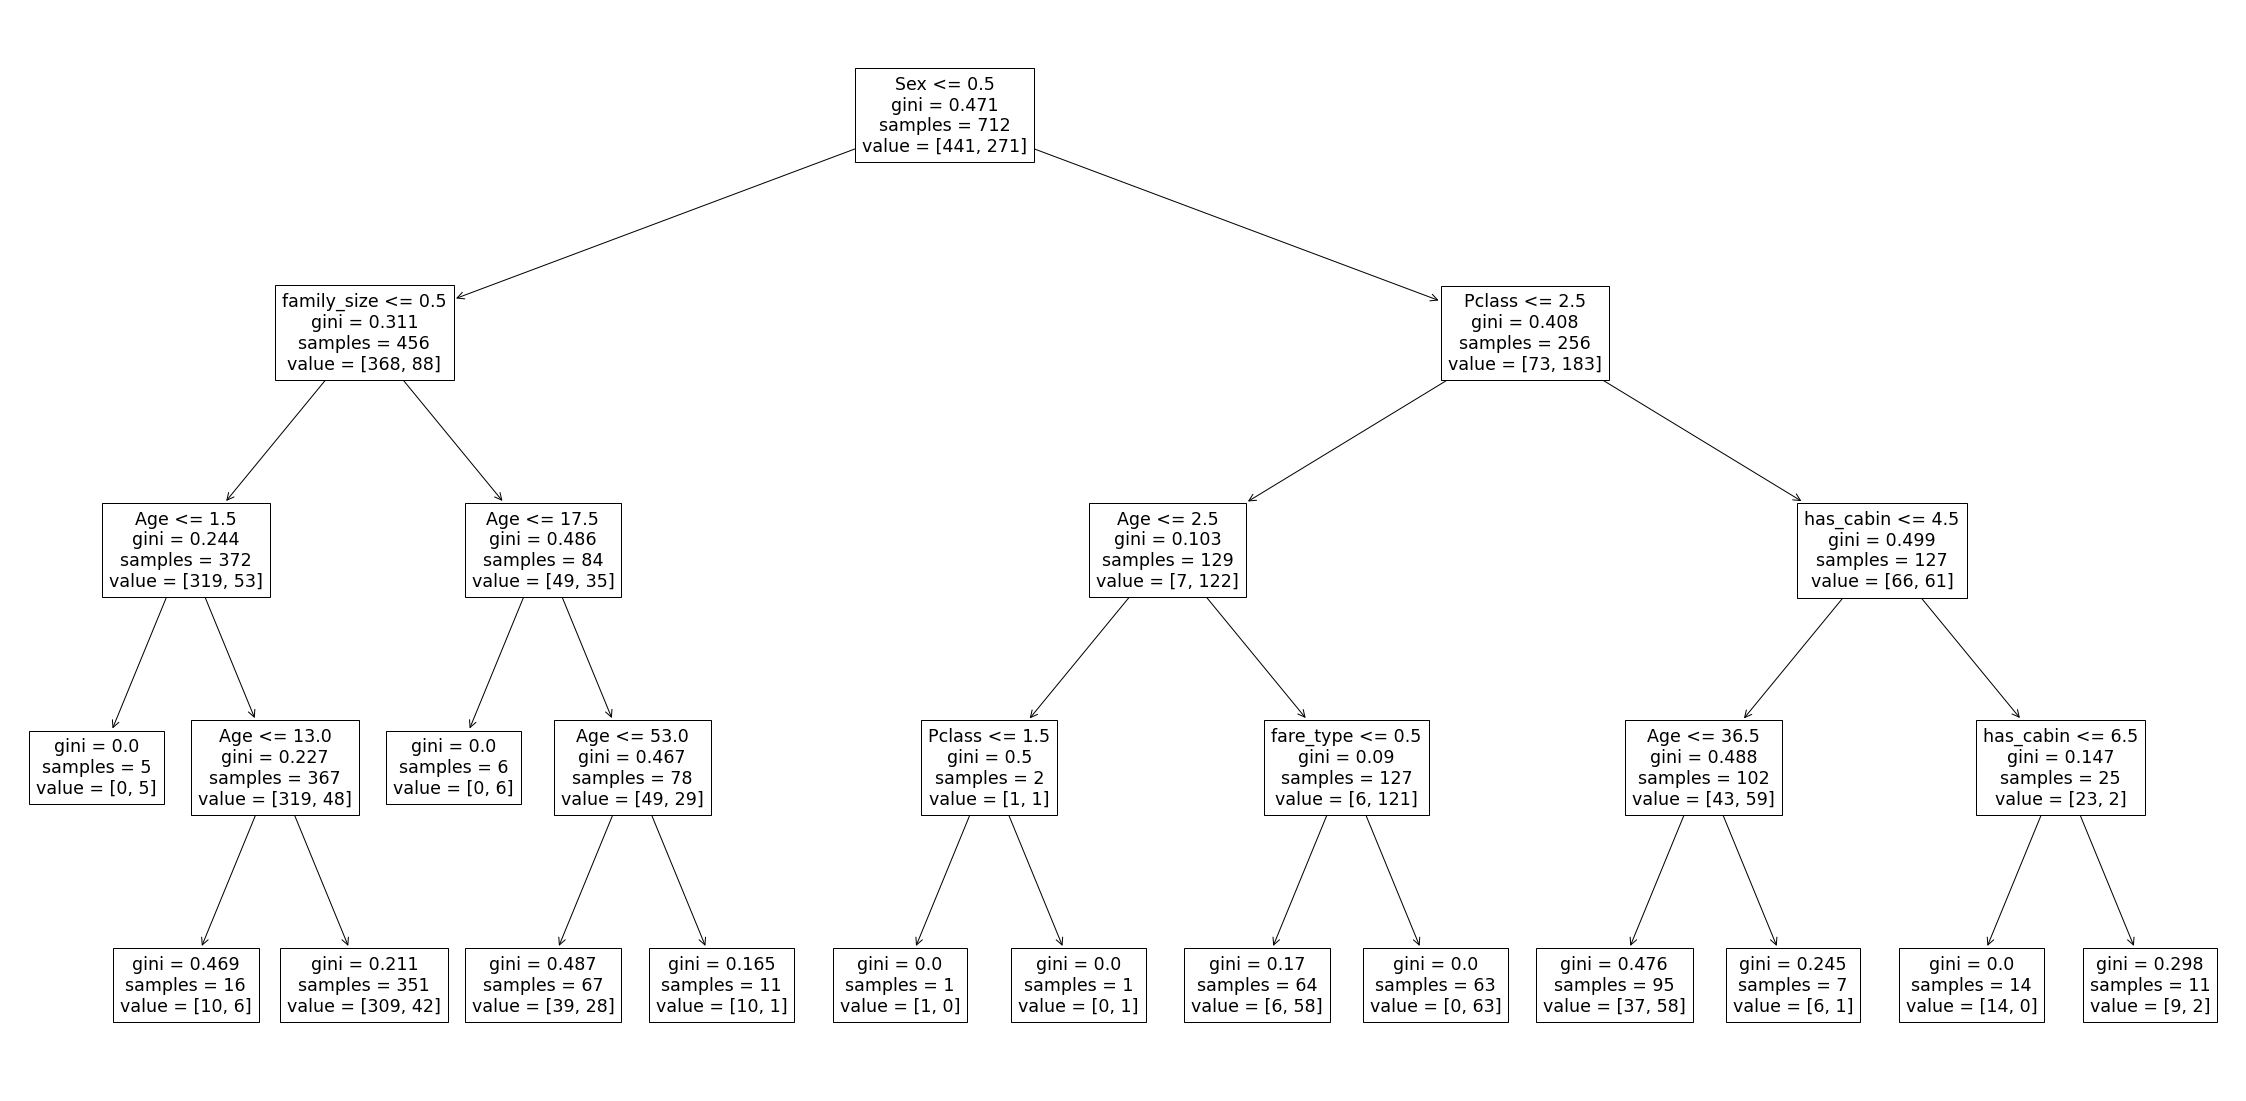

Accuracy score: 0.8435754189944135


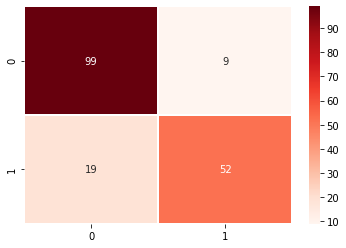

In [240]:
f = pd.read_csv("train.csv")
df_train = pd.DataFrame(f)
def Age_replace_with_mean(df):
    return df['Age'].fillna(df['Age'].mean())
df_train['Age'] = Age_replace_with_mean(df_train)

def gender_to_numerical(df):
    return df.replace(['male','female'],['0','1'])
df_train = gender_to_numerical(df_train)

def Fare_replace_with_mean(df):
    return df['Fare'].fillna(df['Fare'].mean())
df_train['Fare'] = Fare_replace_with_mean(df_train)

# has_cabin feature
def has_cabin(df):
    return df['Cabin'].notnull().astype('int')

df_train['has_cabin'] = has_cabin(df_train)

df_train=df_train.drop(columns=['Cabin'])

# family_size feature
def family_size(df):
    return df['SibSp']+df['Parch']+1
df_train['family_size'] = family_size(df_train)

# title_type feature
def title_type(df):
    return df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

df_train['title_type'] = title_type(df_train)
def title_type_to_numerical(df):
    return df.replace(['Mr','Miss','Mrs','Master','Dr','Rev','Col','Major','Mlle','Countess','Ms','Lady','Jonkheer','Don','Mme','Capt','Sir'],['1','1','1','1','0','0','0','0','0','0','0','0','0','0','0','0','0'])

df_train = title_type_to_numerical(df_train)

#fare_type feature
Kmean = KMeans(n_clusters=3)
X = Kmean.fit_predict(df_train[['Fare']])
label = Kmean.labels_
df_train['fare_type'] = label

df_train = df_train.drop(columns=['PassengerId','Name','Ticket','SibSp','Parch','Fare','Embarked'])

y = df_train['Survived']
X = df_train.drop(columns=['Survived'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
Tree = DecisionTreeClassifier(max_depth =4)
Tree.fit(X_train, y_train)

plt.figure(figsize=(40,20))
plot_tree(Tree,feature_names=['Pclass','Sex','Age','family_size','has_cabin','title_type','fare_type'])
plt.show()

tree_pred= Tree.predict(X_test)
matrix=confusion_matrix(y_test,tree_pred)
sns.heatmap(matrix, annot=True, cmap='Reds',linewidths=1)
print("Accuracy score:",accuracy_score(y_test, tree_pred))

I have change the max-depth of the decision tree and change the number of clusters of fare_type to 3. However, the accuracy score changes everytime.

g) Reduce the dimension of the dataset to 4 before creating a Decision Tree Classifier. Evaluate this classifier by plotting the confusion matrix. Comment on performance differences you observe. How interpretable is this model? 

Accuracy score: 0.659217877094972


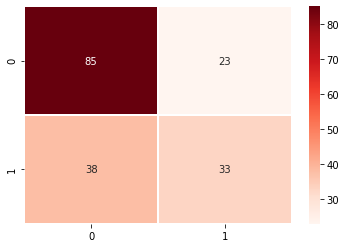

In [246]:

pca = PCA(n_components=4)

train_reduce_dimension = pca.fit_transform(X_train)
test_reduce_dimension = pca.fit_transform(X_test)

Tree = DecisionTreeClassifier()

Tree = Tree.fit(train_reduce_dimension, y_train)

tree_pred= Tree.predict(test_reduce_dimension)
matrix=confusion_matrix(y_test,tree_pred)
sns.heatmap(matrix, annot=True, cmap='Reds',linewidths=1)
print("Accuracy score:",accuracy_score(y_test, tree_pred))



The accuracy decreases with the dimension reduction because the original dataset has more dimentionality than 4. 

# Bonus (20 Points)

**No library functions besides `numpy` are allowed for this bonus. You must use the decision tree you implemented in lab 6**

The Random Forest algorithm is an extension to decision trees. It makes use of multiple decision trees to make a decsion.

Ensemble modeling is a method of constructing a strong model using multiple weak models. Random Forests algorithm is one such ensemble model.

Multiple small decision trees trained on random parts of the training data collectively make a decision on an input point. The number of trees in this Random Forest algorithm is a hyper-parameter that you need to finetune to get the best output from this model. 

Every time you construct a tree, you pick random samples of size 'k' (k samples) from the total dataset and construct the tree. Make sure your tree depth is not very high, or the individual tree could overfit to the data. We want the collective model to generalize well to multiple datasets. 

During classification, we consider the decision of the majority of trees to be the final decision.

In this task, you will implement the random forests algorithm and apply it on the 'Titanic' dataset.

a) construct your model (5 points)

In [ ]:
class SimpleDecisionTree:
    # Copy your code from lab 6 here
    pass

class Random_Forest():

    def __init__(self, num_trees, max_depth):
        self.max_depth = max_depth
        self.decision_trees = [SimpleDecisionTree(max_depth=max_depth) for _ in range(num_trees)]

    def _fit_tree(self, X, y, idx):
        self.decision_trees[idx].fit(X, y)

    def fit(self, X, y):
        for idx in range(len(self.decision_trees)):
            X_sample, y_sample = self._sample(X, y)
            self._fit_tree(X_sample, y_sample, idx)
    
    def _majority(predictions):
        # your code here
        return 
    
    def predict(self, X_test, y_test):
        # your code here
        predictions = ...
        return self._majority(predictions)



b) Hyperparameter tuning, and model evaluation for random forests. (10 points)

In order to avoid the cases of overfitting, we apply something called 'pruning' to the decision trees in this algorithm. Pruning is a method to cut the trees beyond a certain depth. This introduces ambiguity and randomness to the output, while increasing the generalization capability. 

 - Experiment with tree sizes(tree depth) of depth = 5,10,15
 - Experiment with different number of trees [10,50,100,500,1000] and report accuracies
 - Experiment with different information criteria ['gini index', 'entropy'] (you will need to implement the entropy criteria)


Report the accuracy of your best model, and compare it with your accuracy of the decision tree from **1c**. Write your observations on Random Forests algorithm

In [ ]:
# write your code here


c) calculations (5 points)

$$ \text{Information gain} = \text{(Entropy of Parent Node)} - \sum_{c}{\text{(entropy of child node)} }$$

$$Entropy = \sum_{i=1}^{C} -p_{i}log(p_{i})$$
$$p_{i} = \frac{C_{i}}{ \sum_{j=1}^{C} C_{j}}$$
$$C_{i} = \text{Count of elements belonging to class 'i'}$$
$$C = \text{Total Number of Elements}$$

We have total data of 50,000 samples

- We randomly sampled about 5000 samples and trained a decision tree. 
- We are trying to classify the samples at a node for one of the tree 'T'
- Parent Node has 34 samples, out of which 15 are positive, and 19 are negative 
- We divided the node based on a particular column, and now we have two child nodes
- Child 1 has 13 samples, of which 9 are positive and 4 are negative
- Child 2 has 21 samples, of which 6 are positive and 15 are negative,

Calculate the information gain for splitting the parent note based on that column

**Note:** You can attach a handwritten image for this part or write your answer in the markdown cell below. 
